<h2 align="center">Preparacion de datos y modelo</h2>

In [26]:
import pandas as pd

In [6]:
set_medicinas = pd.read_excel("DataSet/medicinas.xlsx")
set_medicinas = set_medicinas.iloc[:,1:] # Eliminar la columna Unnamed: 0
set_medicinas

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,4
1,47,0,0,1,13.093,2
2,47,0,0,1,10.114,2
3,28,1,1,1,7.798,3
4,61,1,0,1,18.043,4
...,...,...,...,...,...,...
195,56,1,0,1,11.567,2
196,16,0,0,1,12.006,2
197,52,0,1,1,9.894,3
198,23,0,1,0,14.020,3


In [7]:
# Verificar valores nulos en el DataFrame
print("Conteo de datos nulos:\n",set_medicinas.isnull().sum())

# Imprimir en consola una muestra de 5 datos del DataFrame
print("Muestra de los datos:\n",set_medicinas.sample(5))

# Describir el DataFrame
print("Descripcion:\n",set_medicinas.describe())

Conteo de datos nulos:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
Muestra de los datos:
      Age  Sex  BP  Cholesterol  Na_to_K  Drug
51    67    0   1            0   10.898     3
75    26    0   0            0   20.909     4
142   60    0   2            0    8.621     1
120   28    0   1            1   27.064     4
169   20    1   2            1   11.262     0
Descripcion:
               Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean    44.315000    0.480000    1.065000     0.515000   16.084485    2.870000
std     16.544315    0.500854    0.839224     0.501029    7.223956    1.372047
min     15.000000    0.000000    0.000000     0.000000    6.269000    0.000000
25%     31.000000    0.000000    0.000000     0.000000   10.445500    2.000000
50%     45.000000    0.000000    1.000000     1.000000   13.936500    3.00

In [21]:
# Separa en conjuntos de caracteristicas y etiquertas (salidas)
# Uso de iloc: df.iloc[#filas_a_tomar,#columnas_a_tomar]
X = set_medicinas.iloc[:,:-1].values # Caracteristicas
Y = set_medicinas.iloc[:,-1].values # Etiquetas

In [9]:
# Dividir los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [10]:
# Construir un modelo de clasificación utilizando el algoritmo de árbol de decisión.
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()

In [11]:
# Entrenar al modelo
modelo.fit(X_train,Y_train)

DecisionTreeClassifier()

<h2 align="center">Calculo de metricas</h2>

In [12]:
# Realizar prediciiones con los datos de prueba
Y_pred = modelo.predict(X_test)

In [15]:
# Calcular las metricas
from sklearn.metrics import accuracy_score, confusion_matrix
matriz = confusion_matrix(Y_test,Y_pred)
print("Exactitud:\n",accuracy_score(Y_test,Y_pred))

Exactitud:
 0.9833333333333333


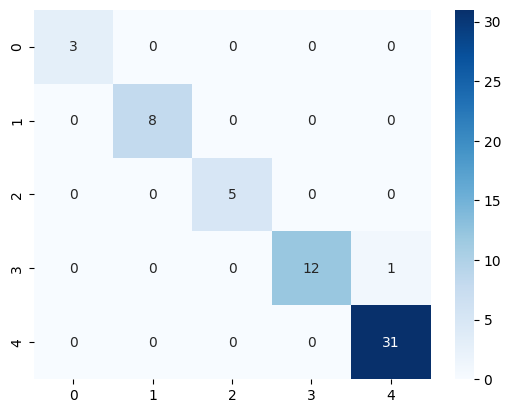

In [17]:
# Mapa de calor de la matriz de comfusión
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matriz,annot=True, fmt="d", cmap="Blues")
plt.show()

In [27]:
# Indique las características del conjunto de datos que tienen mayor y menor importancia
import numpy as np
caracteristicas = set_medicinas.columns[:-1]
importancia = modelo.feature_importances_

for car, imp in zip(caracteristicas, importancia):
    print(f"Caracteristica: {car}, Importancia: {np.round(imp,2)}")

Caracteristica: Age, Importancia: 0.12
Caracteristica: Sex, Importancia: 0.0
Caracteristica: BP, Importancia: 0.29
Caracteristica: Cholesterol, Importancia: 0.12
Caracteristica: Na_to_K, Importancia: 0.47


<h2 align="center">Realizacion de pruebas</h2>

In [22]:
set_medicinas.columns.to_list()[:-1]

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

In [23]:
# Hombre, 45 años, con presión arterial alta, colesterol normal y concentración de sodio y potasio de 12
Datos = [
    [45, 0, 2, 0, 12]
]

tipo_medicamento = modelo.predict(Datos)
print("El medicamento sugerido es:", tipo_medicamento)

El medicamento sugerido es: [0]


In [24]:
# o	Mujer, 30 años, con presión arterial normal, colesterol normal y concentración de sodio y potasio de 30
Datos = [
    [30, 1, 1, 0, 30]
]

tipo_medicamento = modelo.predict(Datos)
print("El medicamento sugerido es:", tipo_medicamento)

El medicamento sugerido es: [4]


In [25]:
# o	Mujer, 65 años, con presión arterial bajo, colesterol alto y concentración de sodio y potasio de 7
Datos = [
    [65, 1, 0, 1, 7]
]

tipo_medicamento = modelo.predict(Datos)
print("El medicamento sugerido es:", tipo_medicamento)

El medicamento sugerido es: [2]
